In [ ]:
import pandas as pd
import numpy as np
import requests
import warnings
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from statsmodels.tsa.holtwinters import ExponentialSmoothing

warnings.filterwarnings('ignore')

In [ ]:
# URL

url = 'https://renatomaaliw3.github.io/prelims.html'

# Send requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# Response

response = requests.get(url, headers=headers)

# Create a bs4 object to parse the HTML content

soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
table = soup.find('table', id='set_c')
data = []
tbody = table.find('tbody', class_='tbody-03')
rows = tbody.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

df = pd.DataFrame(data, columns=['Date', 'Value'])
df


,Date,Value
0,1979-01-01,10.93497679
1,1979-01-02,10.92887136
2,1979-01-03,10.92807184
3,1979-01-04,10.93673089
4,1979-01-05,10.90085553
...,...,...
995,1981-09-22,72.56170608
996,1981-09-23,72.72467531
997,1981-09-24,72.87288186
998,1981-09-25,73.04839945


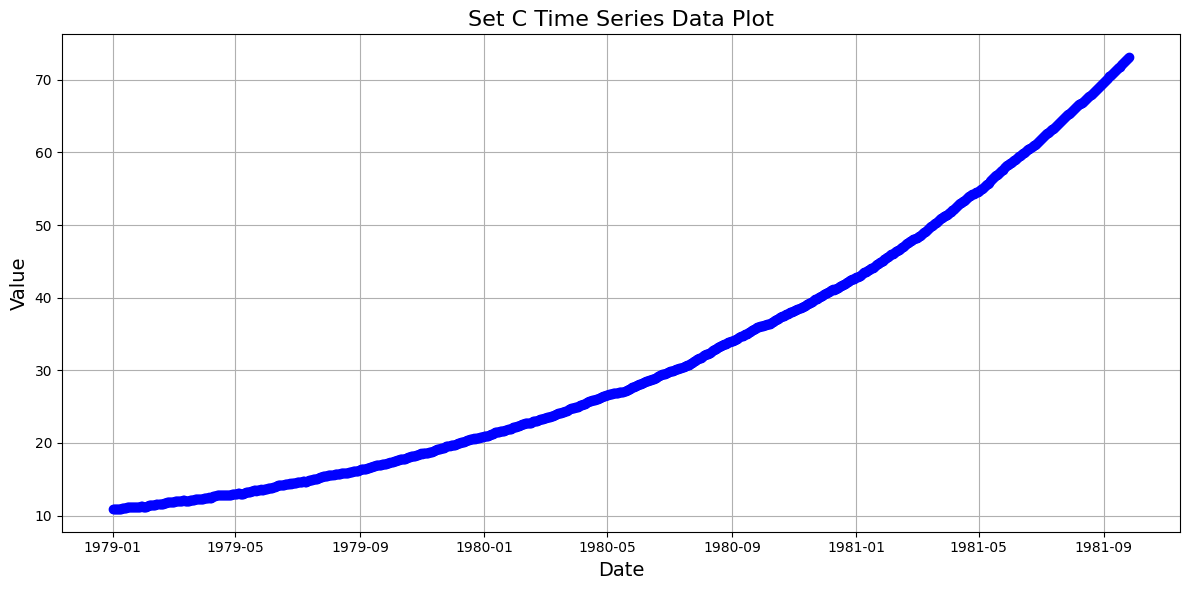

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Value'] = df['Value'].astype(float)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], marker='o', linestyle='-', color='blue')
plt.title('Set C Time Series Data Plot', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

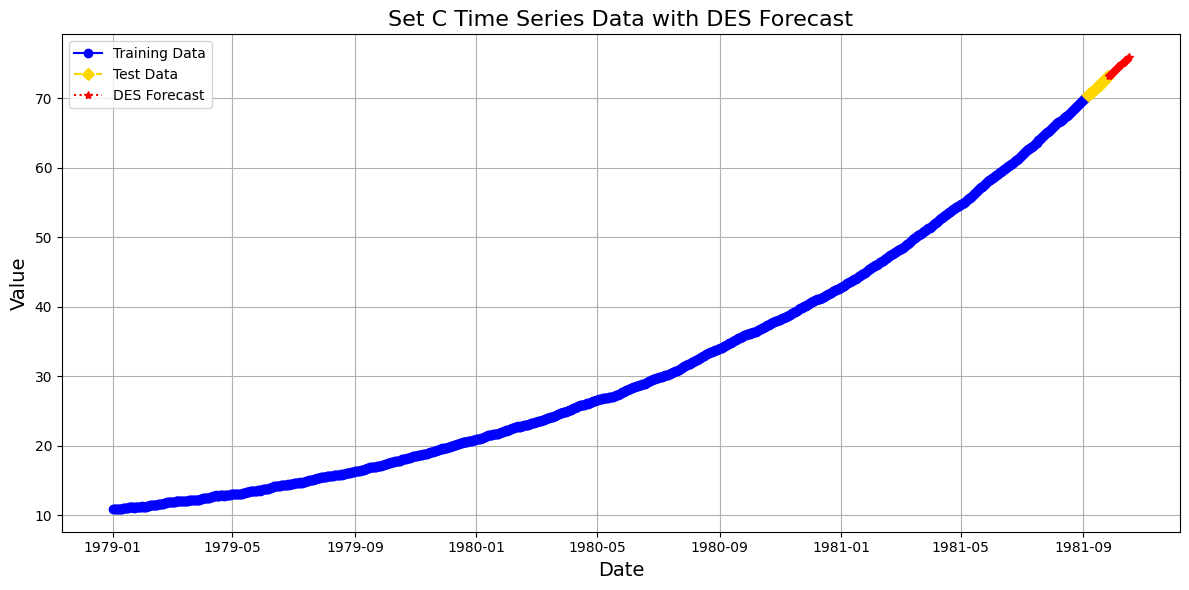

In [ ]:

plt.figure(figsize=(12, 6))

plt.plot(
    train_data.index, train_data['Value'],
    label='Training Data',
    marker='o', linestyle='-', color='blue'
)

plt.plot(
    test_data.index, test_data['Value'],
    label='Test Data',
    marker='D', linestyle='--', color='gold'
)

plt.plot(
    forecast.index, forecast,
    label='DES Forecast',
    marker='*', linestyle=':', color='red'
)

plt.title('Set C Time Series Data with DES Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Zooming in for Seasonality

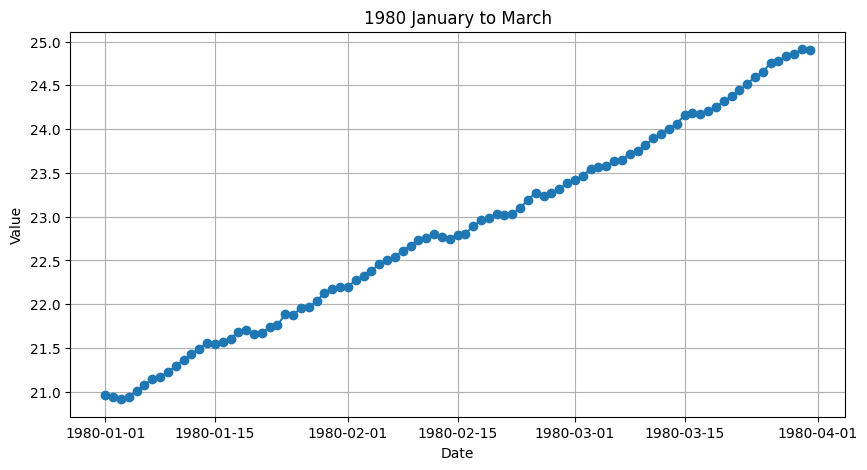

In [ ]:
# Zooming In
df_1980 = df[(df['Date'] >= '1980-01-01') & (df['Date'] <= '1980-03-31')]

plt.figure(figsize=(10, 5))
plt.plot(df_1980['Date'], df_1980['Value'], marker='o', linestyle='-')
plt.title('1980 January to March')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout
plt.show()


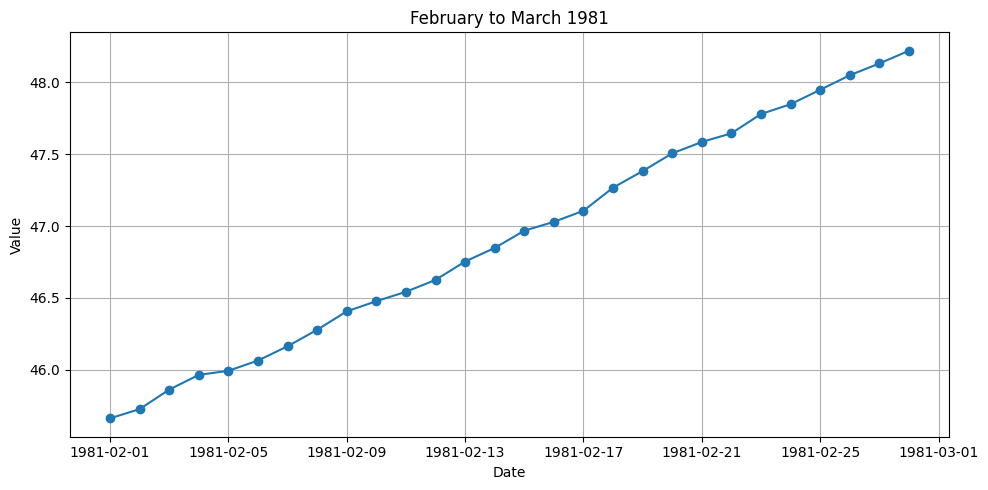

In [ ]:
df_1981_feb = df[(df['Date'] >= '1981-02-01') & (df['Date'] <= '1981-02-28')]

plt.figure(figsize=(10, 5))
plt.plot(df_1981_feb['Date'], df_1981_feb['Value'], marker='o', linestyle='-')
plt.title('February to March 1981')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Question 2

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
data = df.set_index('Date')

forecast_horizon = 21
train_data = data.iloc[:-forecast_horizon]
test_data = data.iloc[-forecast_horizon:]

DES_model = ExponentialSmoothing(train_data['Value'], trend='mul', seasonal=None).fit()

forecast = DES_model.forecast(forecast_horizon)

forecast_14th_day = forecast.iloc[13]

print("Forecast value on the 14th day against the test data:", forecast_14th_day)

Forecast value on the 14th day against the test data: 72.22857312768897


# Question 3

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

forecast_horizon = 21

DES_model = ExponentialSmoothing(df['Value'], trend='mul', seasonal=None).fit()

forecast = DES_model.forecast(forecast_horizon)

forecast_21st_day = forecast.iloc[20]

print("Forecast value on the 21st day:", forecast_21st_day)

Forecast value on the 21st day: 76.22237260225604
